This notebook deals with the orbits of all the close stars ($d \leq 8\, kpc$)

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 12})
#from astropy.visualization import astropy_mpl_style
#plt.style.use(astropy_mpl_style)
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.io import fits, ascii
from astropy.table import Table, Column, vstack, hstack

import MagellanicStream as ms

import warnings
warnings.filterwarnings('ignore')

import galpy as gp
from galpy.potential import MWPotential2014, plotPotentials, plotDensities, plotRotcurve, MiyamotoNagaiPotential
from galpy.orbit import Orbit

In [61]:
#import data for 51 closest stars
heir = fits.getdata('/Users/joshpovick/Desktop/Research/fits/MS_youngfits/heir.fits',1)
heir = Table(heir)

In [16]:
#find duplicates
def list_duplicates(seq):
    seen = set()
    seen_add = seen.add
    # adds all elements it doesn't know yet to seen and all other to seen_twice
    seen_twice = set( x for x in seq if x in seen or seen_add(x) )
    # turn the set into a list (as requested)
    return list( seen_twice )

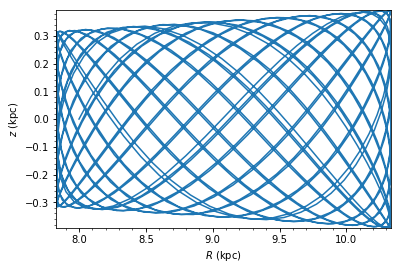

In [3]:
#testing example code from documentation
o= Orbit(vxvv=[1.,0.1,1.1,0.,0.1],ro=8.,vo=220.)
ts= np.linspace(0,100,1000)
o.integrate(ts,MWPotential2014,method='odeint')
o.plot()

In [4]:
#Convert to cylindrical coordinates !!!Not Used!!!
from astropy.coordinates import Distance

def cart2cyl(x, y, z):
    r = np.sqrt(np.square(x)+np.square(y))
    phi = np.arctan(np.divide(y,x))
    return r,phi,z

galact = []
for i in range(len(heir)):
    cr = coord.ICRS(ra=heir['RA'][i]*u.degree, dec=heir['DEC'][i]*u.degree, \
                        distance=Distance(parallax=(heir['parallax'][i]+0.052)*u.mas,allow_negative=True),\
                        pm_ra_cosdec=heir['pmra'][i]*u.mas/u.yr,\
                        pm_dec=heir['pmdec'][i]*u.mas/u.yr,
                        radial_velocity=heir['VLSR'][i]*u.km/u.s)
    gcoor = cr.transform_to(coord.Galactocentric)
    galact.append(gcoor)

    
#the following is unused 
galx = [] 
galy = []
galz = []
velx = []
vely = []
velz = []
for i in range(len(galact)):
    galx.append(galact[i].x.value*(1/1000.))
    galy.append(galact[i].y.value*(1/1000.))
    galz.append(galact[i].z.value*(1/1000.))
    velx.append(galact[i].v_x.value)
    vely.append(galact[i].v_x.value)
    velz.append(galact[i].v_x.value)
    
galr,galphi,galz = cart2cyl(galx,galy,galz)
velr,velphi,velz = cart2cyl(velx,vely,velz)

In [133]:
###sort table by star name

#find dups and save
#len(list_duplicates(heir['NAME']))
nom0 = np.where(heir['NAME']==list_duplicates(heir['NAME'])[0])
nom1 = np.where(heir['NAME']==list_duplicates(heir['NAME'])[1])
nom2 = np.where(heir['NAME']==list_duplicates(heir['NAME'])[2])
nom3 = np.where(heir['NAME']==list_duplicates(heir['NAME'])[3])
nomtab0 = heir[nom0]
nomtab1 = heir[nom1]
nomtab2 = heir[nom2]
nomtab3 = heir[nom3]

rm4now = np.append(np.append(np.append(nom0,nom1),nom2),nom3).tolist()
#print(rm4now)

heir2 = Table(np.copy(heir))
heir2.remove_rows([14, 15, 28, 29, 23, 24, 6, 7])

#sort without dups
heir2.sort('NAME')

#add dups back in
heir2.insert_row(5,vals=nomtab3[0])
heir2.insert_row(6,vals=nomtab3[1])
heir2.insert_row(13,vals=nomtab0[0])
heir2.insert_row(14,vals=nomtab0[0])
heir2.insert_row(23,vals=nomtab2[0])
heir2.insert_row(24,vals=nomtab2[0])
heir2.insert_row(28,vals=nomtab1[0])
heir2.insert_row(29,vals=nomtab1[0])
#heir2.show_in_browser(jsviewer=True)

#duplicates located at [[1452,5,6],[1480,13,14],[1518,23,24],[1530,28,29]]

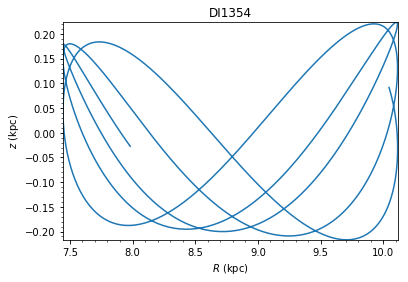

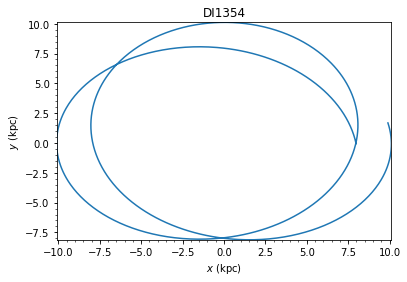

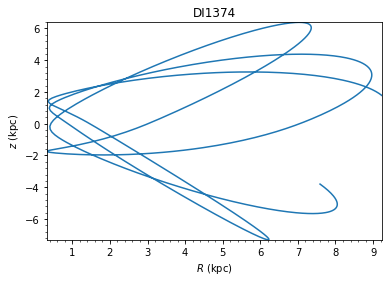

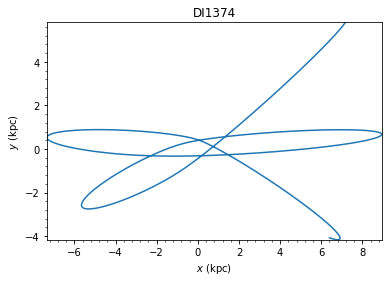

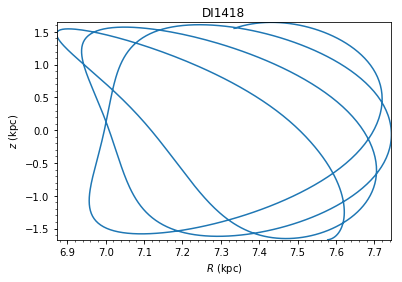

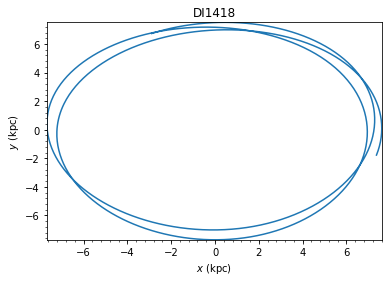

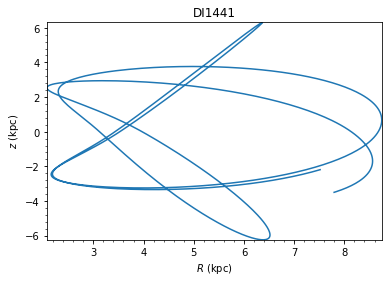

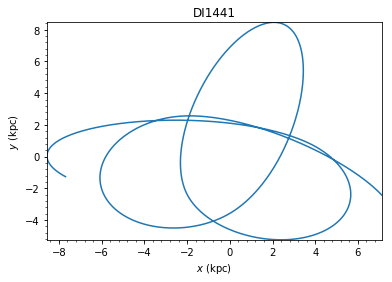

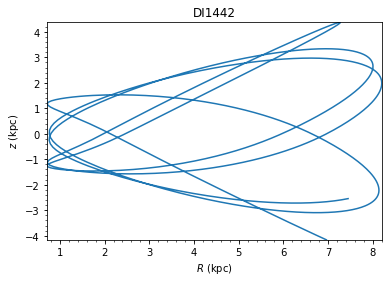

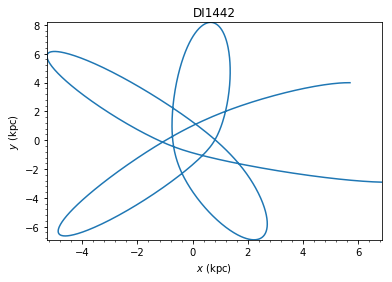

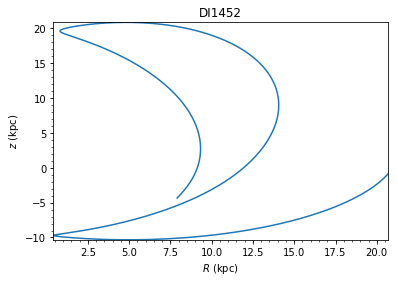

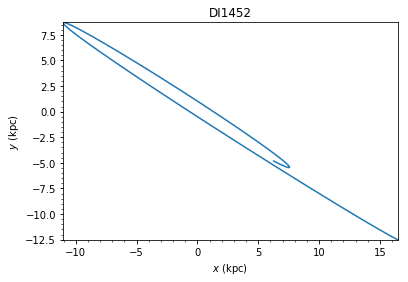

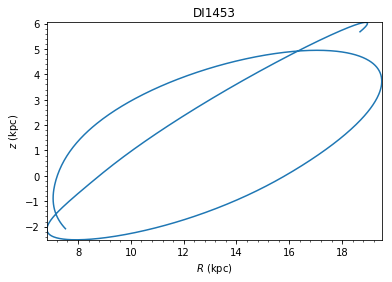

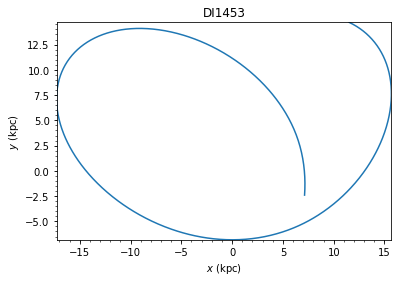

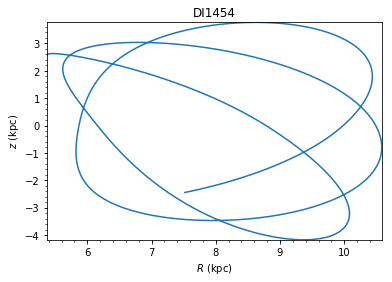

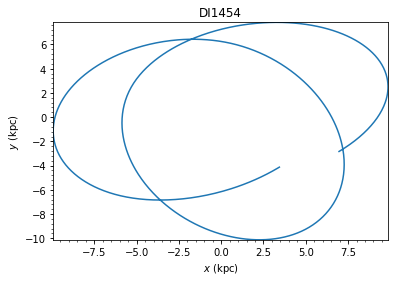

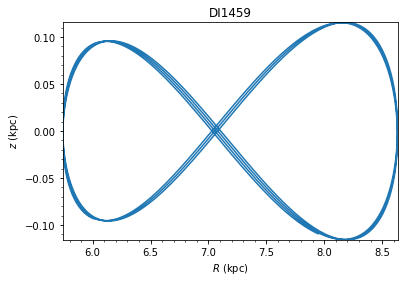

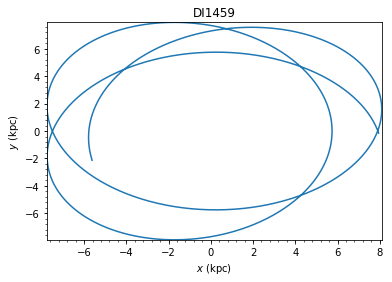

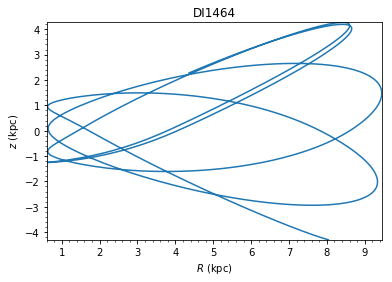

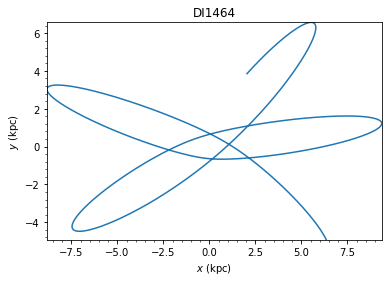

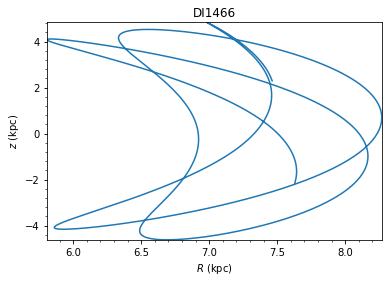

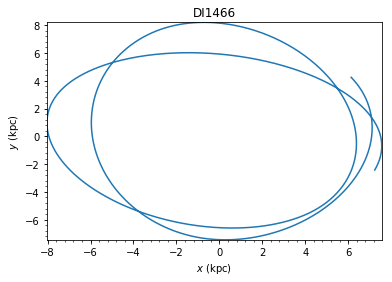

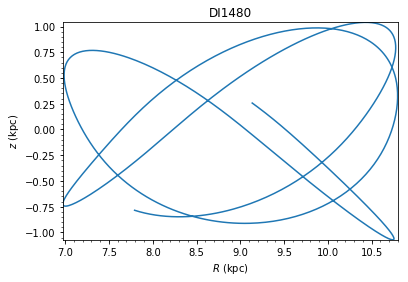

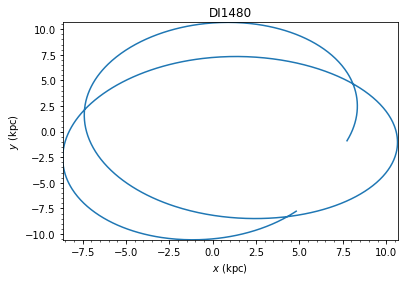

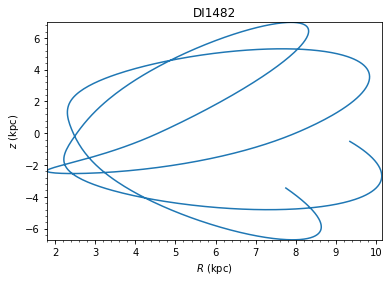

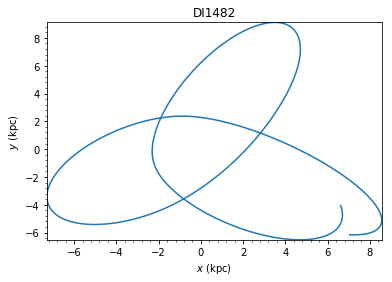

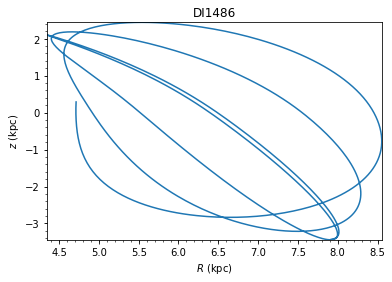

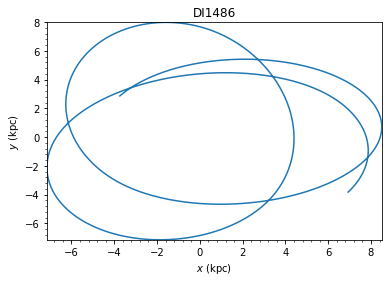

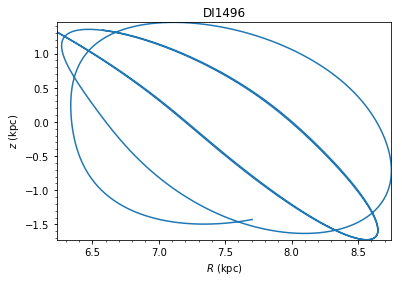

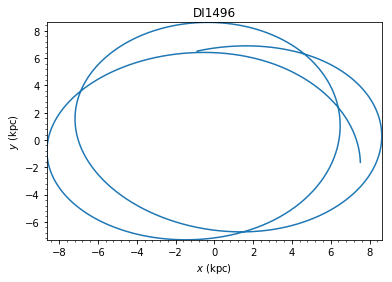

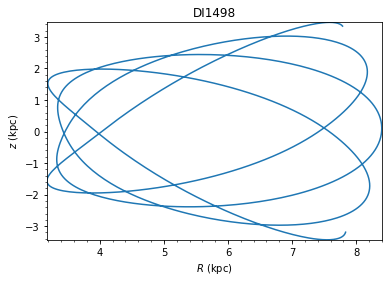

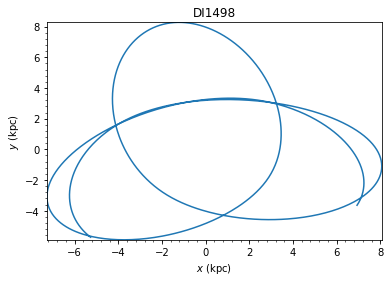

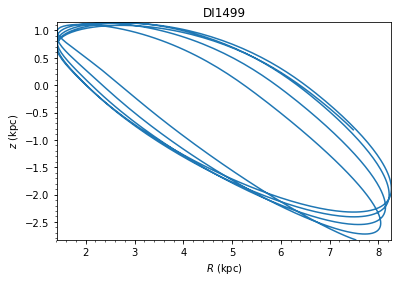

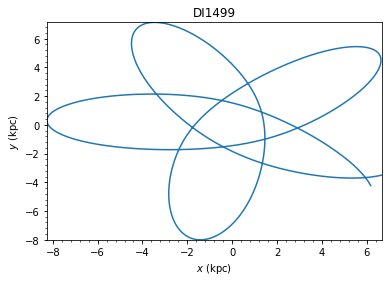

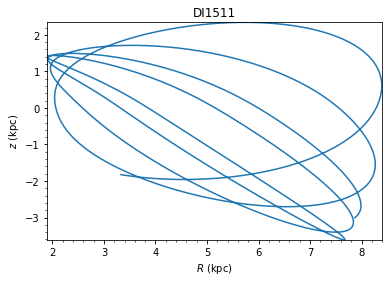

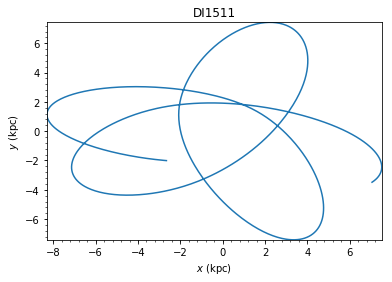

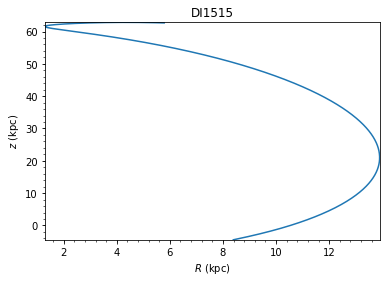

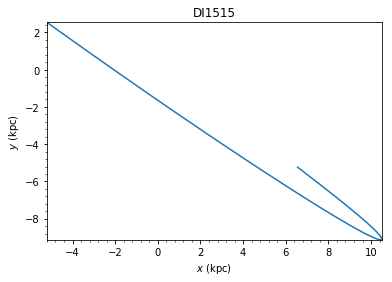

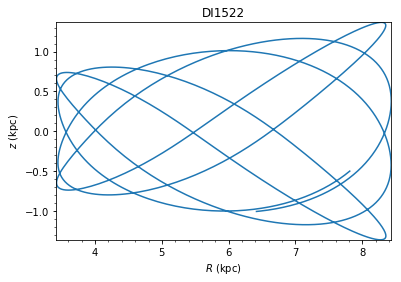

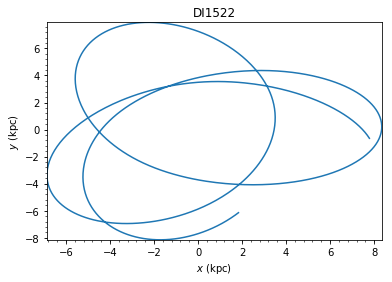

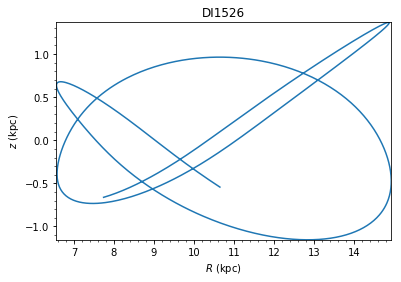

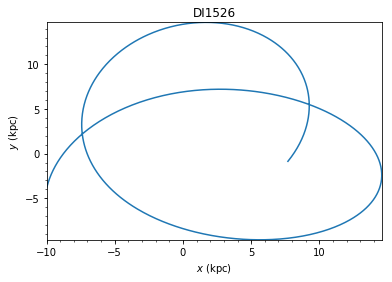

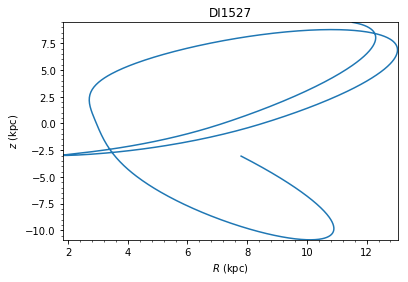

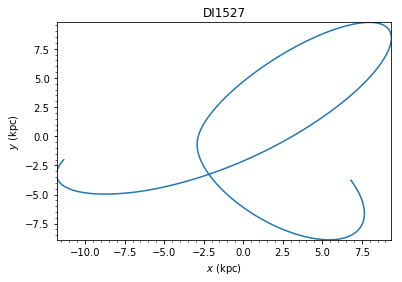

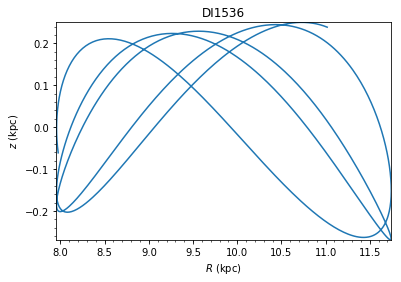

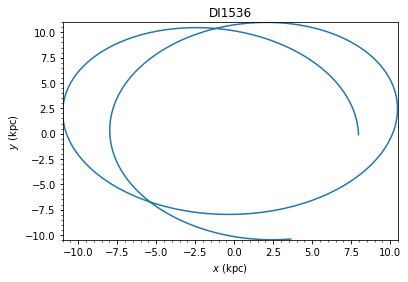

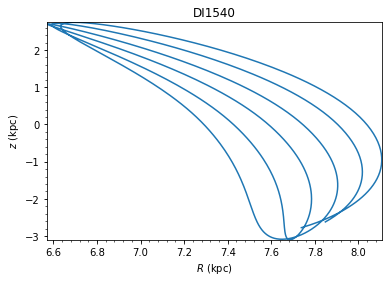

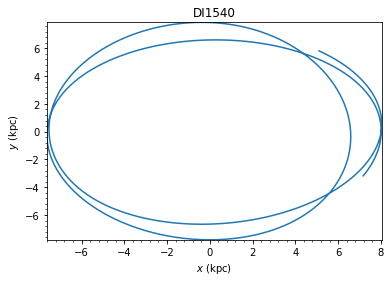

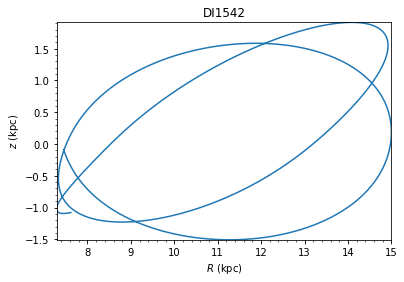

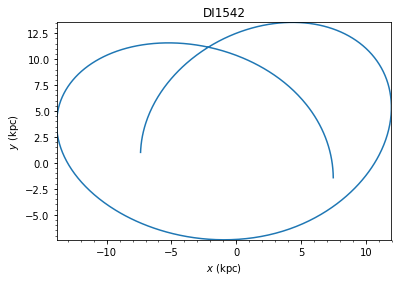

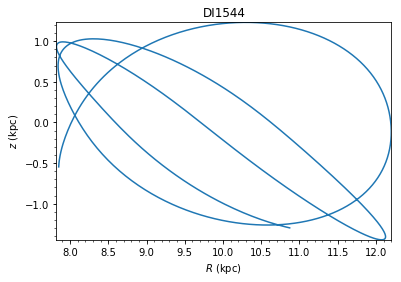

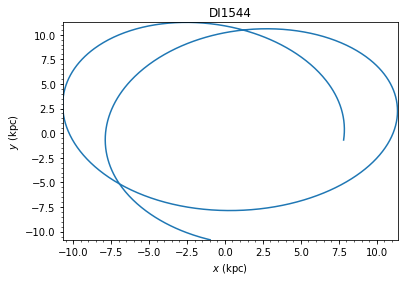

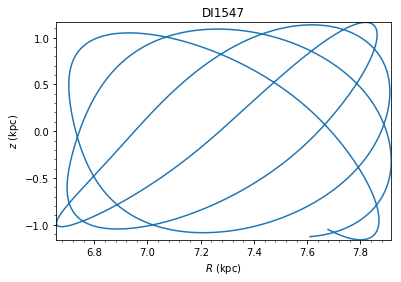

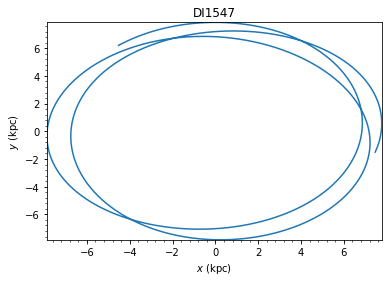

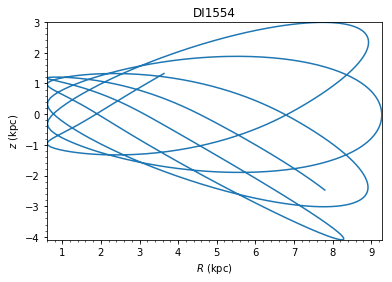

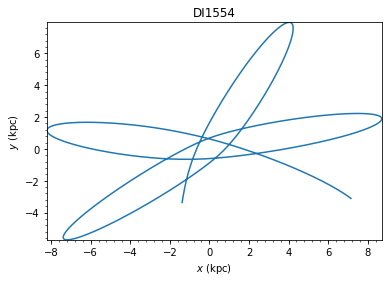

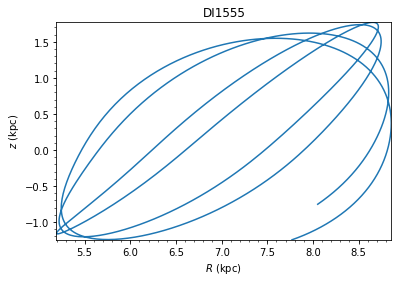

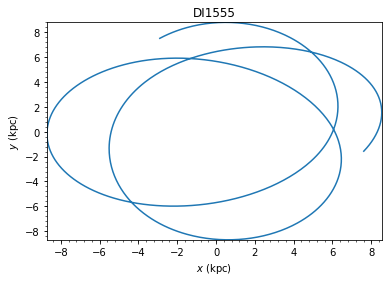

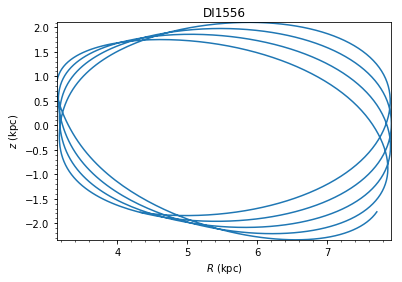

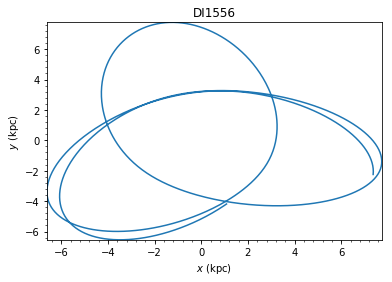

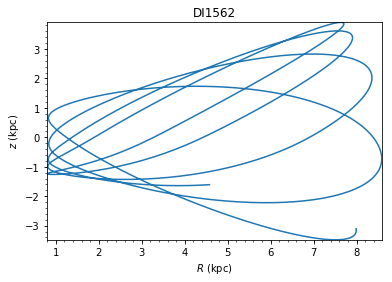

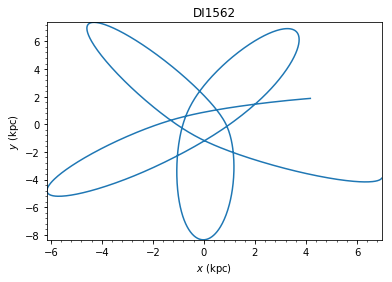

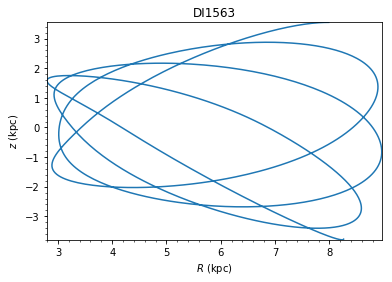

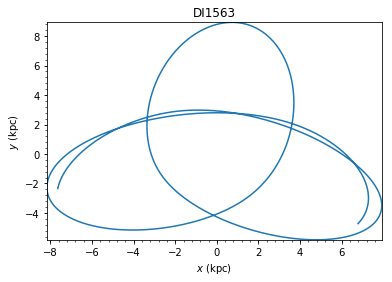

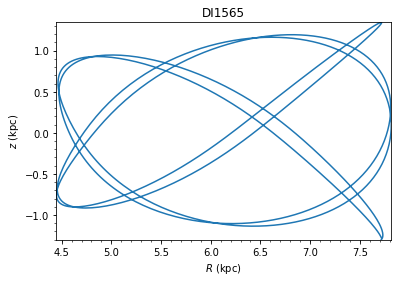

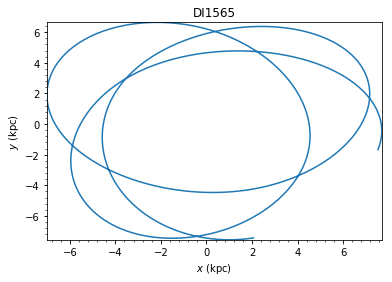

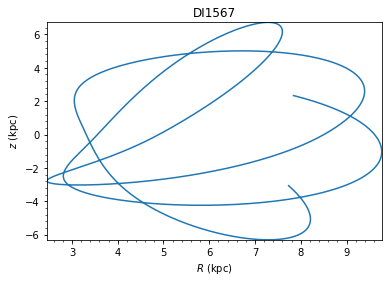

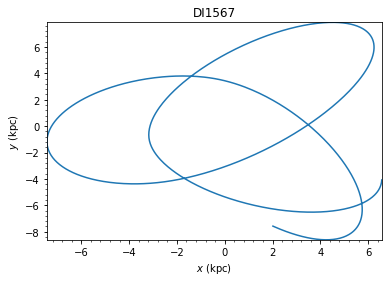

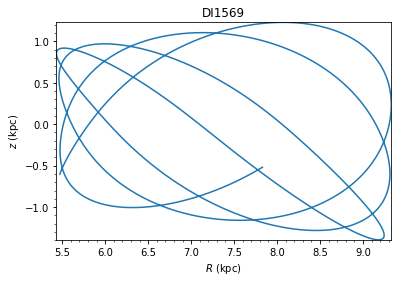

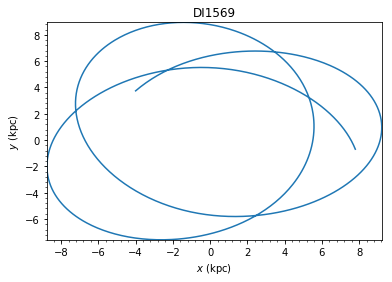

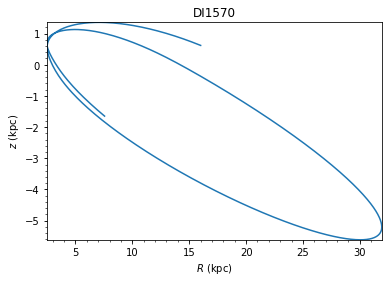

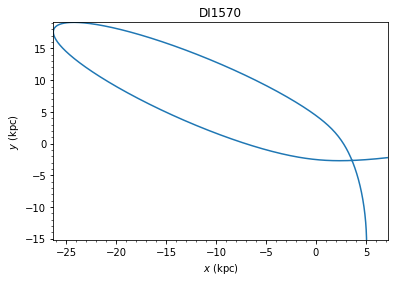

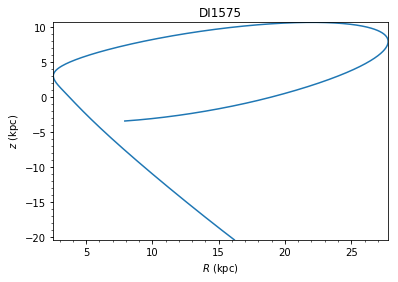

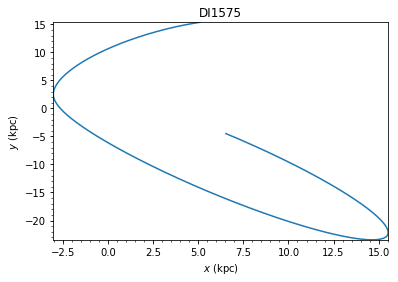

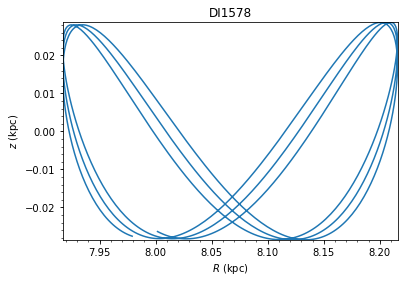

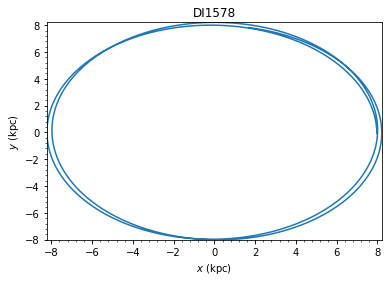

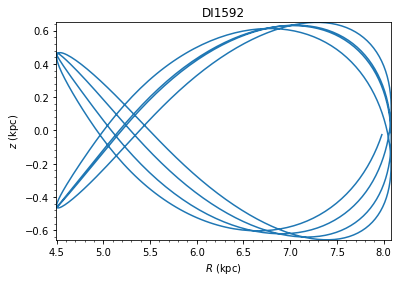

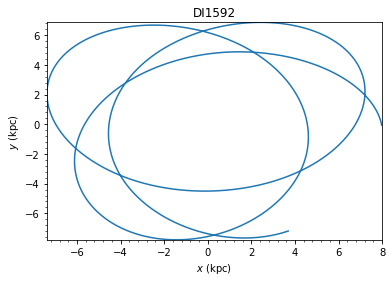

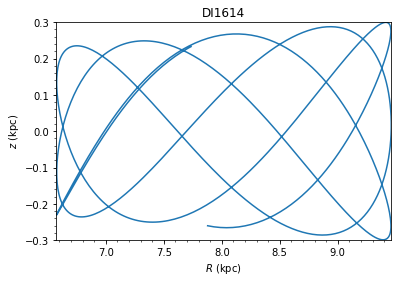

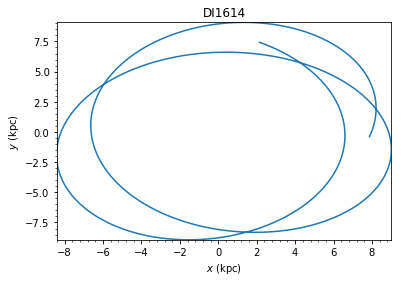

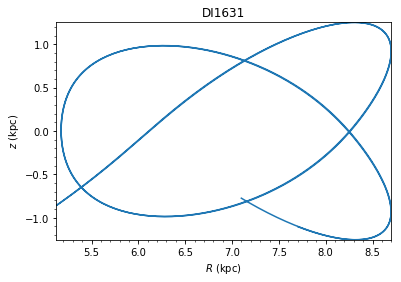

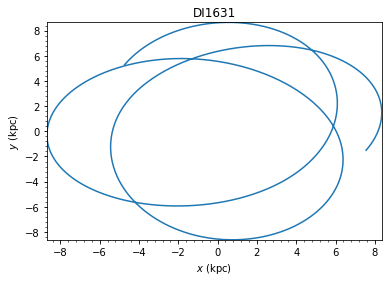

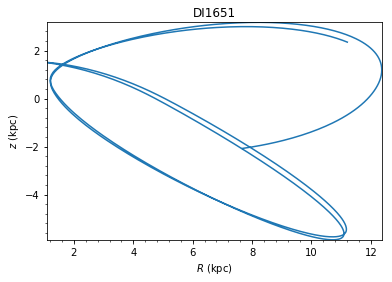

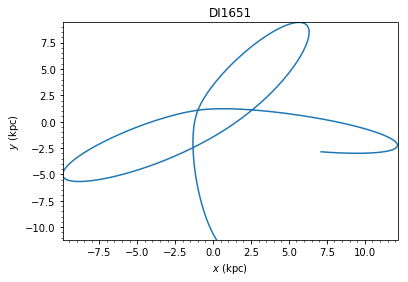

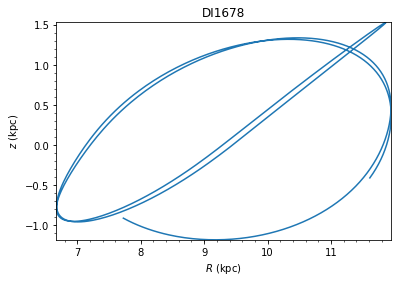

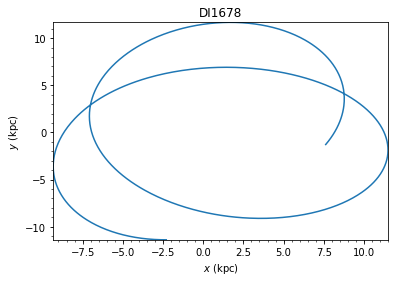

In [145]:
#plot orbits

orbparams = []
orbR = []
orbPhi = []
orbZ = []
orbvR = []
orbvPhi = []
orbvZ = []
orbX = []
orbY = []
orbvX = []
orbvY = []


ts = np.linspace(0,500,1000)*u.Myr #Evolve for 500 Myr with 1000 timesteps or point every 500,000 years

for i in np.delete(range(len(heir)),[5,6,13,14,23,24,28,29]):
    orb=Orbit(vxvv=[heir2['RA'][i],heir2['DEC'][i],np.reciprocal(heir2['parallax'][i]+0.052),heir2['pmra'][i],\
                      heir2['pmdec'][i],heir2['VHELIO'][i]],radec=True)
    orb.integrate(ts,MWPotential2014,method='rk4_c')
    orb.plot(use_physical=True,label='{}'.format(heir['NAME'][i])) #use_physical=True
    plt.title('{}'.format(heir['NAME'][i]))
    orb.plot(d1='x',d2='y',use_physical=True,label='{}'.format(heir['NAME'][i]))
    plt.title('{}'.format(heir['NAME'][i]))
    orbparams.append([heir2['NAME'][i],orb.e(),orb.rperi(),orb.rap(),orb.zmax()])
    orbR.append(orb.R(ts))
    orbPhi.append(orb.phi(ts))
    orbZ.append(orb.z(ts))
    orbvR.append(orb.vR(ts))
    orbvPhi.append(orb.vphi(ts))
    orbvZ.append(orb.vz(ts))
    orbX.append(orb.x(ts))
    orbY.append(orb.y(ts))
    orbvX.append(orb.vx(ts))
    orbvY.append(orb.vy(ts))

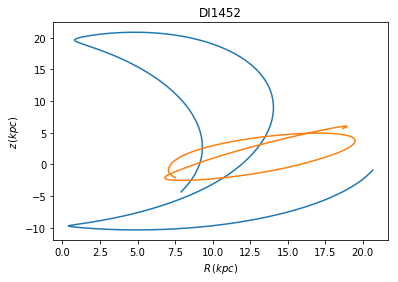

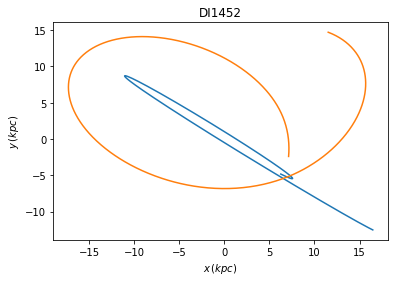

e: 0.4180937876722191, 0.47395687974959366
peri: 8.924214782984366, 7.098686214791245
apo: 21.748132732554655, 19.890303628520982
zmax: 20.860940792727753, 6.04602925065647


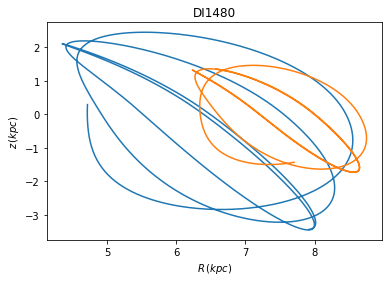

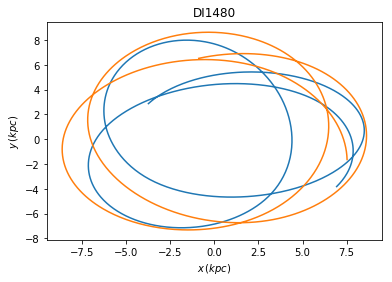

e: 0.2959937527671437, 0.16244254863193403
peri: 4.711190045124613, 6.340668892877609
apo: 8.672753815152936, 8.800188328369156
zmax: 3.4420971454462035, 1.725534565801158


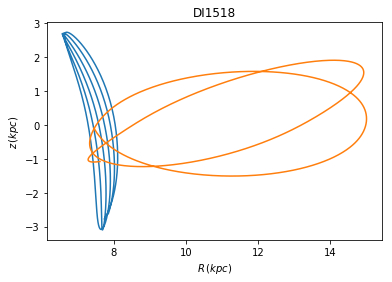

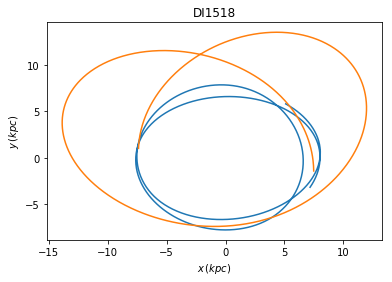

e: 0.07911385759865695, 0.34247483592526345
peri: 7.076323104036971, 7.34921701886522
apo: 8.29218507132647, 15.004960191088323
zmax: 3.099557174957717, 1.914198536915552


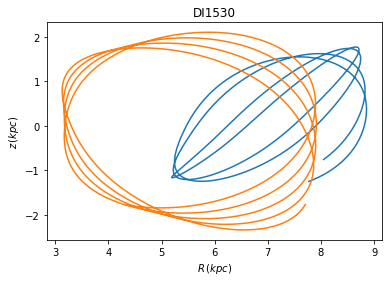

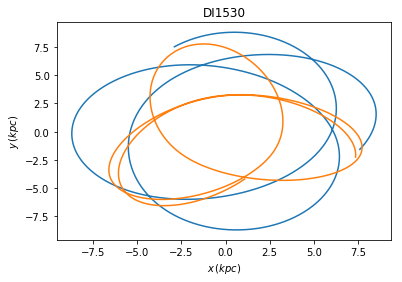

e: 0.25293700358106946, 0.42802854441939525
peri: 5.297023007857016, 3.173472676040195
apo: 8.88390425864784, 7.923139384150193
zmax: 1.7712881942992131, 2.337781481885507


In [155]:
#Duplicate Star Orbit Plots

#DI1452
plt.figure()
plt.plot(orbR[5],orbZ[5])
plt.plot(orbR[6],orbZ[6])
plt.title(heir2['NAME'][5])
plt.xlabel(r'$R\,(kpc)$')
plt.ylabel(r'$z\,(kpc)$')
plt.show()
plt.figure()
plt.plot(orbX[5],orbY[5])
plt.plot(orbX[6],orbY[6])
plt.title(heir2['NAME'][6])
plt.xlabel(r'$x\,(kpc)$')
plt.ylabel(r'$y\,(kpc)$')
plt.show()
print('e:'+' '+str(orbparams[5][1])+', '+str(orbparams[6][1]))
print('peri:'+' '+str(orbparams[5][2])+', '+str(orbparams[6][2]))
print('apo:'+' '+str(orbparams[5][3])+', '+str(orbparams[6][3]))
print('zmax:'+' '+str(orbparams[5][4])+', '+str(orbparams[6][4]))

#DI1480
plt.figure()
plt.plot(orbR[13],orbZ[13])
plt.plot(orbR[14],orbZ[14])
plt.title(heir2['NAME'][13])
plt.xlabel(r'$R\,(kpc)$')
plt.ylabel(r'$z\,(kpc)$')
plt.show()
plt.figure()
plt.plot(orbX[13],orbY[13])
plt.plot(orbX[14],orbY[14])
plt.title(heir2['NAME'][14])
plt.xlabel(r'$x\,(kpc)$')
plt.ylabel(r'$y\,(kpc)$')
plt.show()
print('e:'+' '+str(orbparams[13][1])+', '+str(orbparams[14][1]))
print('peri:'+' '+str(orbparams[13][2])+', '+str(orbparams[14][2]))
print('apo:'+' '+str(orbparams[13][3])+', '+str(orbparams[14][3]))
print('zmax:'+' '+str(orbparams[13][4])+', '+str(orbparams[14][4]))

#DI1518
plt.figure()
plt.plot(orbR[23],orbZ[23])
plt.plot(orbR[24],orbZ[24])
plt.title(heir2['NAME'][23])
plt.xlabel(r'$R\,(kpc)$')
plt.ylabel(r'$z\,(kpc)$')
plt.show()
plt.figure()
plt.plot(orbX[23],orbY[23])
plt.plot(orbX[24],orbY[24])
plt.title(heir2['NAME'][24])
plt.xlabel(r'$x\,(kpc)$')
plt.ylabel(r'$y\,(kpc)$')
plt.show()
print('e:'+' '+str(orbparams[23][1])+', '+str(orbparams[24][1]))
print('peri:'+' '+str(orbparams[23][2])+', '+str(orbparams[24][2]))
print('apo:'+' '+str(orbparams[23][3])+', '+str(orbparams[24][3]))
print('zmax:'+' '+str(orbparams[23][4])+', '+str(orbparams[24][4]))

#DI1530
plt.figure()
plt.plot(orbR[28],orbZ[28])
plt.plot(orbR[29],orbZ[29])
plt.title(heir2['NAME'][28])
plt.xlabel(r'$R\,(kpc)$')
plt.ylabel(r'$z\,(kpc)$')
plt.show()
plt.figure()
plt.plot(orbX[28],orbY[28])
plt.plot(orbX[29],orbY[29])
plt.title(heir2['NAME'][29])
plt.xlabel(r'$x\,(kpc)$')
plt.ylabel(r'$y\,(kpc)$')
plt.show()
print('e:'+' '+str(orbparams[28][1])+', '+str(orbparams[29][1]))
print('peri:'+' '+str(orbparams[28][2])+', '+str(orbparams[29][2]))
print('apo:'+' '+str(orbparams[28][3])+', '+str(orbparams[29][3]))
print('zmax:'+' '+str(orbparams[28][4])+', '+str(orbparams[29][4]))

In [7]:
#create a table of the orbit parameters
nom = []
ecc = []
per = []
apo = []
zma = []
params  = Table()

for i in range(len(orbparams)):
    nom.append(orbparams[i][0])
    ecc.append(orbparams[i][1])
    per.append(orbparams[i][2])
    apo.append(orbparams[i][3])
    zma.append(orbparams[i][4])

params['NAME'] = nom
params['ECCENTRICITY'] = ecc
params['PERIGALACTICON'] = per
params['APOGALACTICON'] = apo
params['ZMAX'] = zma 

#params.show_in_notebook()

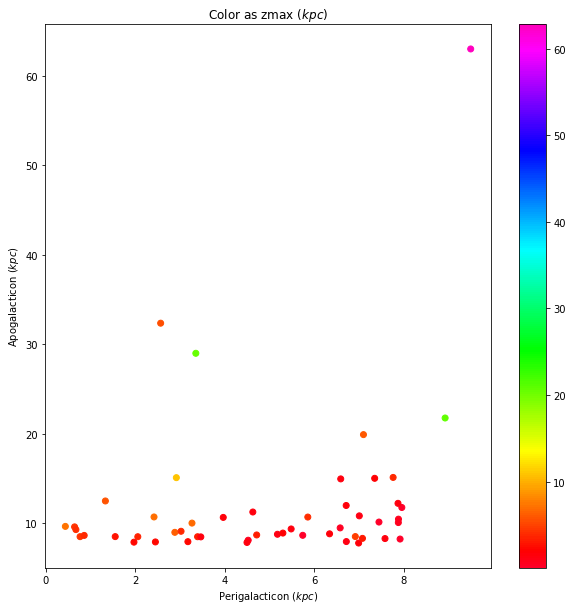

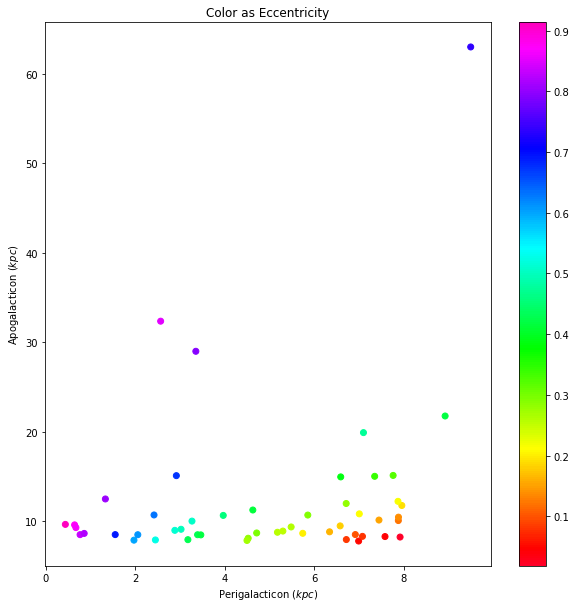

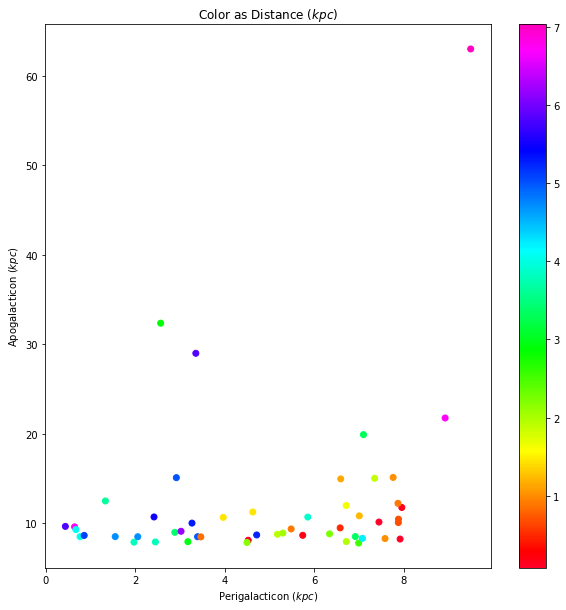

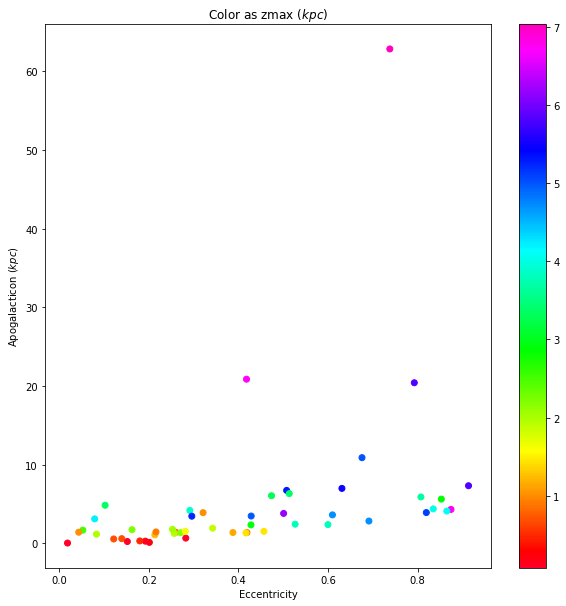

In [8]:
###parameter plots from cell above

#perigalacticon apogalacticon zmax
plt.figure(figsize=(10,10))
plt.scatter(params['PERIGALACTICON'],params['APOGALACTICON'],c=params['ZMAX'],cmap='gist_rainbow')
plt.xlabel(r'Perigalacticon $(kpc)$')
plt.ylabel(r'Apogalacticon $(kpc)$')
plt.title(r'Color as zmax $(kpc)$')
plt.colorbar()
plt.show()

#perigalacticon apogalacticon eccentricity
plt.figure(figsize=(10,10))
plt.scatter(params['PERIGALACTICON'],params['APOGALACTICON'],c=params['ECCENTRICITY'],cmap='gist_rainbow')
plt.xlabel(r'Perigalacticon $(kpc)$')
plt.ylabel(r'Apogalacticon $(kpc)$')
plt.title(r'Color as Eccentricity')
plt.colorbar()
plt.show()

#perigalacticon apogalacticon distance
plt.figure(figsize=(10,10))
plt.scatter(params['PERIGALACTICON'],params['APOGALACTICON'],c=np.reciprocal(heir['parallax']+0.052),cmap='gist_rainbow')
plt.xlabel(r'Perigalacticon $(kpc)$')
plt.ylabel(r'Apogalacticon $(kpc)$')
plt.title(r'Color as Distance $(kpc)$')
plt.colorbar()
plt.show()


#eccentricity zmax distance
plt.figure(figsize=(10,10))
plt.scatter(params['ECCENTRICITY'],params['ZMAX'],c=np.reciprocal(heir['parallax']+0.052),cmap='gist_rainbow')
plt.xlabel(r'Eccentricity')
plt.ylabel(r'Apogalacticon $(kpc)$')
plt.title(r'Color as zmax $(kpc)$')
plt.colorbar()
plt.show()

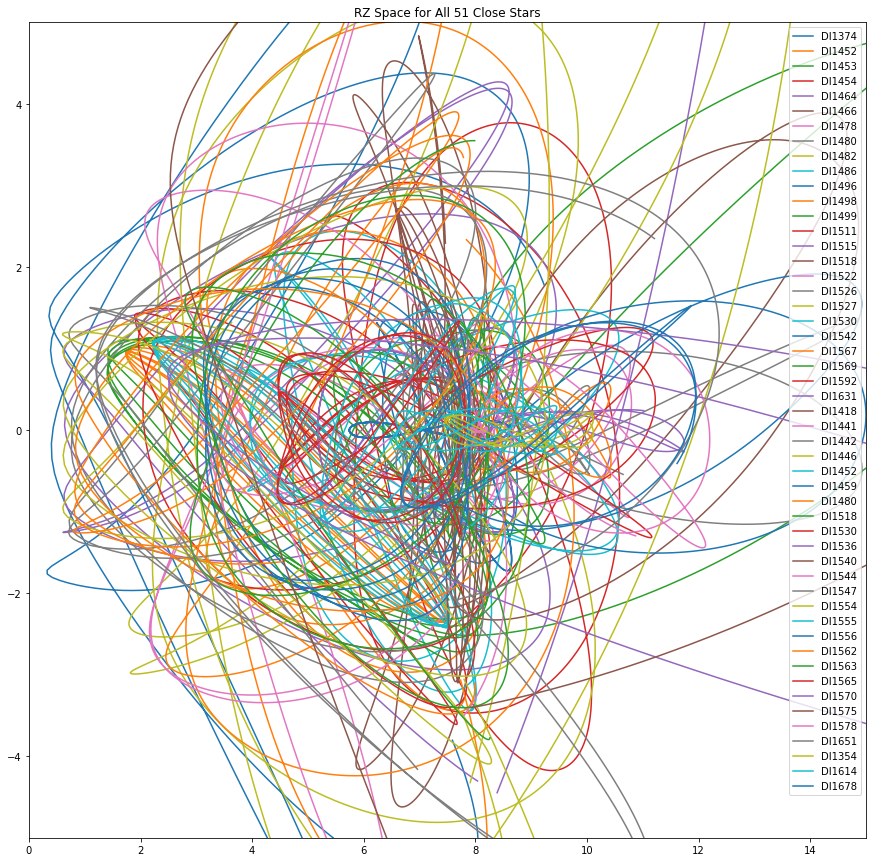

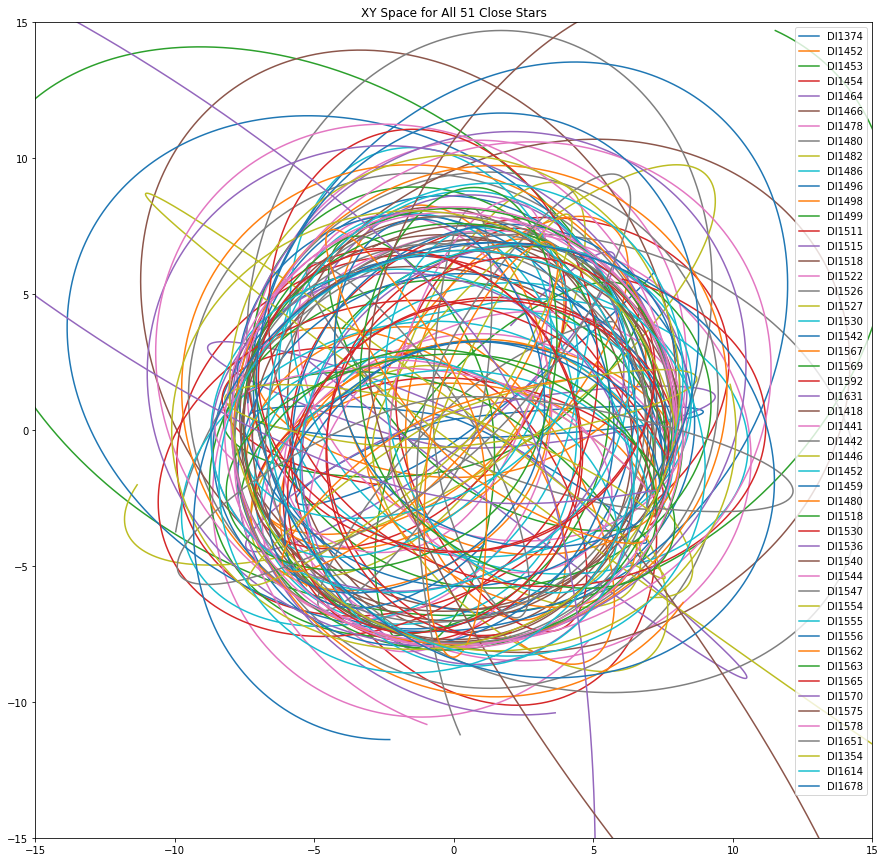

In [9]:
#Combine all orbit RZ and XY plots 
ts = np.linspace(0,500,1000)*u.Myr #Evolve for 500 Myr with 1000 timesteps or point every 500,000 years

plt.figure(figsize=(15,15))
for i in range(len(heir)):
    orb=Orbit(vxvv=[heir['RA'][i],heir['DEC'][i],np.reciprocal(heir['parallax'][i]+0.052),heir['pmra'][i],\
                    heir['pmdec'][i],heir['VHELIO'][i]],radec=True)
    orb.integrate(ts,MWPotential2014,method='rk4_c')
    orb.plot(use_physical=True,overplot=True,label='{}'.format(heir['NAME'][i]))
plt.legend(loc='upper right',fontsize=10)
plt.xlim(0,15)
plt.ylim(-5,5)
plt.title(r'RZ Space for All 51 Close Stars')
plt.show()

plt.figure(figsize=(15,15))
for i in range(len(heir)):
    orb=Orbit(vxvv=[heir['RA'][i],heir['DEC'][i],np.reciprocal(heir['parallax'][i]+0.052),heir['pmra'][i],\
                    heir['pmdec'][i],heir['VHELIO'][i]],radec=True)
    orb.integrate(ts,MWPotential2014,method='rk4_c')
    orb.plot(d1='x',d2='y',use_physical=True,overplot=True,label='{}'.format(heir['NAME'][i]))
plt.legend(loc='upper right',fontsize=10)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.title(r'XY Space for All 51 Close Stars')
plt.show()